# Visualizing generated molecules 

In [89]:
import random
from rdkit import Chem
from rdkit.Chem import Draw
from plot_utils import load_chid
from pathlib import Path
import matplotlib.pyplot as plt 
import cairosvg
import tempfile
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from PyPDF2 import PdfFileWriter, PdfFileReader

order = ('Split1', 'Split2', 'Split1_alt')

In [90]:
def save_svg(svg, filepath):
    """
    Save svg content in filepath

    :param str  svg:        SVG content
    :param str  filepath:   Path of the SVG file to save
    :return:
    """
    try:
        file_handle = open(filepath, 'w')
    except IOError as e:
        print(str(e))
        exit(1)

    file_handle.write(svg)
    file_handle.close() 

# 1. JAK2 revisited

In [107]:
results_dir = Path('results/new_datasets/')
chid = 'CHEMBL3888429'

### Graph GA

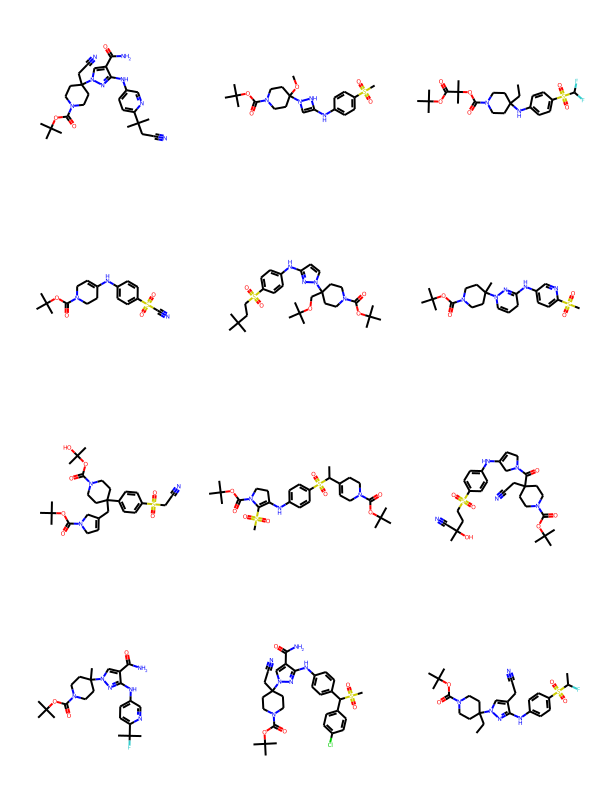

In [108]:
optimizer = 'graph_ga'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)])

### LSTM HC

In [110]:
optimizer = 'lstm_hc'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)


from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions

DrawingOptions.atomLabelFontSize = 25
DrawingOptions.dotsPerAngstrom = 50
DrawingOptions.bondLineWidth = 0.5
 
smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])

# save to pdf for lstm results, as display of large molecules is of low quality otherwise 
molsPerRow=3
nRows = len(smiles_opt) // molsPerRow
if len(smiles_opt) % molsPerRow:
    nRows += 1
    
subImgSize=(200, 200)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DSVG(fullSize[0], fullSize[1], subImgSize[0], subImgSize[1])
d2d.drawOptions().prepareMolsBeforeDrawing=False
DrawingOptions.atomLabelFontSize = 5
DrawingOptions.dotsPerAngstrom = 10
DrawingOptions.bondLineWidth = 0.1
d2d.DrawMolecules(list([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)]))
d2d.FinishDrawing()
svg_text = d2d.GetDrawingText()
with tempfile.NamedTemporaryFile(delete=True) as tmp:
    tmp.write(svg_text.encode())
    tmp.flush()
    cairosvg.svg2pdf(url=tmp.name, write_to="figures/{0}_{1}_temp.pdf".format(chid, optimizer))

output = PdfFileWriter() 
input = PdfFileReader(open('figures/{0}_{1}_temp.pdf'.format(chid, optimizer), 'rb')) 

n = input.getNumPages()

for i in range(n):
    page = input.getPage(i)
    page.cropBox.lowerLeft = (0, 310850)
    page.cropBox.lowerRight = (450, 310850)
    output.addPage(page) 

outputStream = open('figures/{0}_{1}.pdf'.format(chid, optimizer),'wb') 
output.write(outputStream) 
outputStream.close() 

### MSO

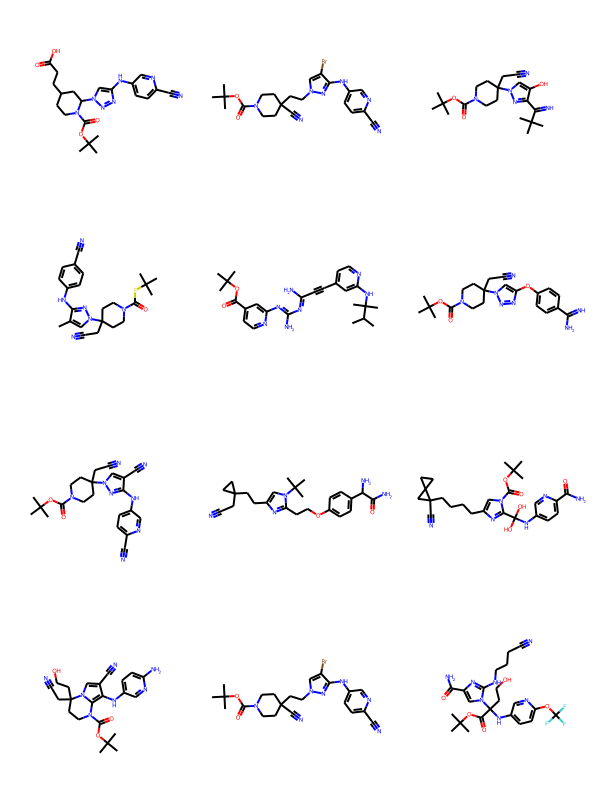

In [94]:
optimizer = 'mso'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)])

# 2. ALDH1

In [112]:
results_dir = Path('results/new_datasets/')
chid = 'ALDH1'

### Graph GA

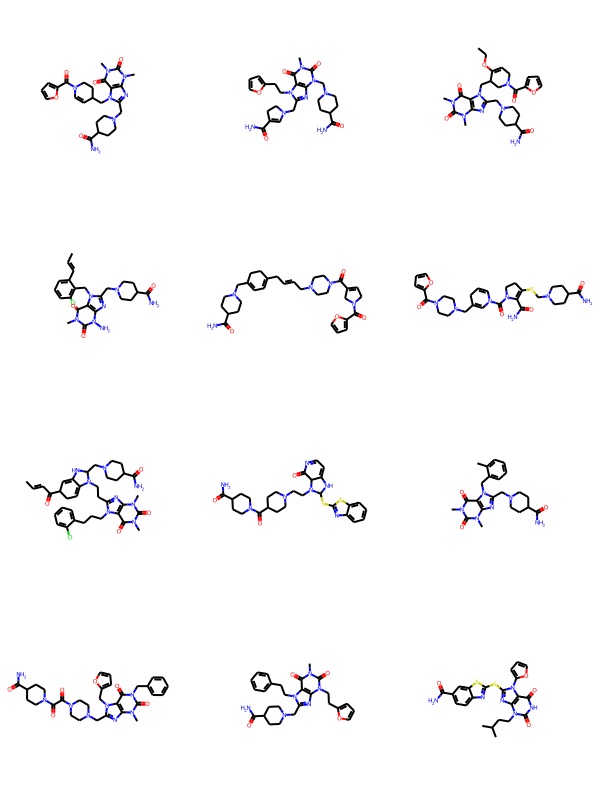

In [113]:
optimizer = 'graph_ga'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)])

### LSTM HC

In [116]:
optimizer = 'lstm_hc'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])


DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 1.0
 
smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])

# save to pdf for lstm results, as display of large molecules is of low quality otherwise 
molsPerRow=3
nRows = len(smiles_opt) // molsPerRow
if len(smiles_opt) % molsPerRow:
    nRows += 1
    
subImgSize=(200, 200)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DSVG(fullSize[0], fullSize[1], subImgSize[0], subImgSize[1])
d2d.drawOptions().prepareMolsBeforeDrawing=False
DrawingOptions.atomLabelFontSize = 5
DrawingOptions.dotsPerAngstrom = 10
DrawingOptions.bondLineWidth = 0.05
d2d.DrawMolecules(list([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)]))
d2d.FinishDrawing()
svg_text = d2d.GetDrawingText()
with tempfile.NamedTemporaryFile(delete=True) as tmp:
    tmp.write(svg_text.encode())
    tmp.flush()
    cairosvg.svg2pdf(url=tmp.name, write_to="figures/{0}_{1}_temp.pdf".format(chid, optimizer))

output = PdfFileWriter() 
input = PdfFileReader(open('figures/{0}_{1}_temp.pdf'.format(chid, optimizer), 'rb')) 

n = input.getNumPages()

for i in range(n):
    page = input.getPage(i)
    page.cropBox.lowerLeft = (0, 340000)
    page.cropBox.lowerRight = (450, 340000)
    output.addPage(page) 

outputStream = open('figures/{0}_{1}.pdf'.format(chid, optimizer),'wb') 
output.write(outputStream) 
outputStream.close() 

### MSO

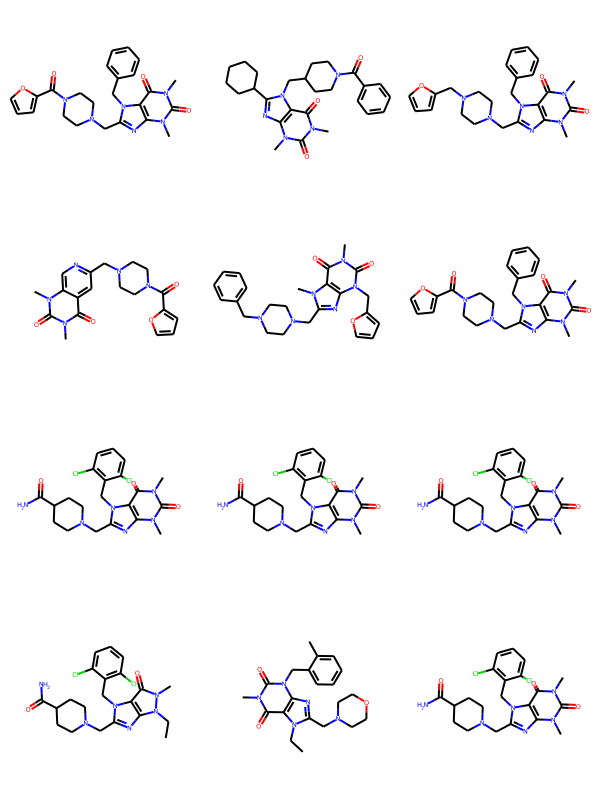

In [98]:
optimizer = 'mso'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)])